#### 1. Load bộ dữ liệu (CIFAR10)

In [1]:
from keras.datasets.cifar10 import load_data

(X_train, y_train), (X_test, y_test) = load_data()

170508288/170498071 [==============================] - 3s 0us/step


#### 2. Chuẩn bị dữ liệu

In [2]:
from tensorflow.keras.utils import to_categorical

X_train_new = X_train/255.0

X_test_new = X_test/255.0

y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

#### 3. Xây dựng mô hình

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.losses import CategoricalCrossentropy

EPOCHS = 25
BATCH_SIZE = 128

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))

optimizer = Nadam()
loss = CategoricalCrossentropy()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
model.compile(optimizer=optimizer, loss=loss, metrics="accuracy")

In [ ]:
history = model.fit(X_train_new, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_test_new, y_test))

Epoch 1/25
391/391 [==============================] - 20s 21ms/step - loss: 1.6063 - accuracy: 0.4190 - val_loss: 1.2717 - val_accuracy: 0.5451
Epoch 2/25
391/391 [==============================] - 7s 19ms/step - loss: 1.1587 - accuracy: 0.5924 - val_loss: 1.1440 - val_accuracy: 0.5975
Epoch 3/25
391/391 [==============================] - 7s 19ms/step - loss: 0.9585 - accuracy: 0.6641 - val_loss: 0.9998 - val_accuracy: 0.6501
Epoch 4/25
391/391 [==============================] - 7s 19ms/step - loss: 0.8133 - accuracy: 0.7161 - val_loss: 0.8585 - val_accuracy: 0.7057
Epoch 5/25
391/391 [==============================] - 7s 19ms/step - loss: 0.7027 - accuracy: 0.7563 - val_loss: 0.8495 - val_accuracy: 0.7111
Epoch 6/25
391/391 [==============================] - 7s 18ms/step - loss: 0.5975 - accuracy: 0.7917 - val_loss: 0.8498 - val_accuracy: 0.7184
Epoch 7/25
391/391 [==============================] - 8s 20ms/step - loss: 0.4870 - accuracy: 0.8297 - val_loss: 0.8376 - val_accuracy: 0.727

acc

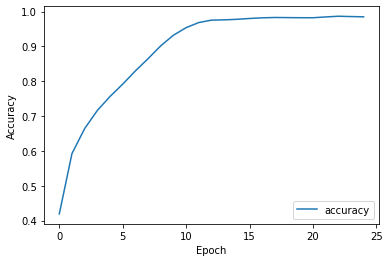

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

val_acc

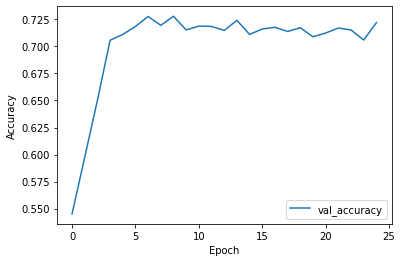

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

loss

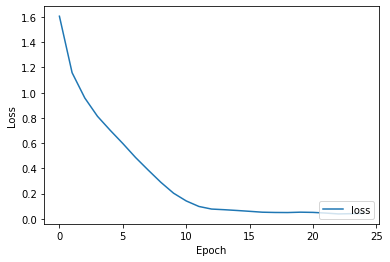

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

val_loss

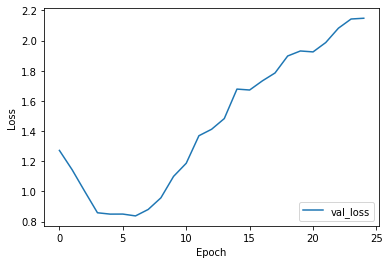

In [ ]:
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

#### ResNet50

In [ ]:
from keras.applications.resnet import ResNet50
from keras.layers import Dense, Flatten
from keras.models import Model, Input

resnet50 = ResNet50(include_top=False, input_shape=(32, 32, 3))

for layer in resnet50.layers:
    layer.trainable = True
    
flat = Flatten()(resnet50.layers[-1].output)

fc1 = Dense(1024, activation='relu')(flat)

output = Dense(10, activation='softmax')(fc1)

model_resnet50 = Model(inputs=resnet50.inputs, outputs=output)

model_resnet50.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                             

In [ ]:
model_resnet50.compile(optimizer=optimizer, loss=loss, metrics="accuracy")

In [ ]:
history_resnet50 = model_resnet50.fit(X_train_new, y_train, batch_size=BATCH_SIZE, epochs=10, validation_data=(X_test_new, y_test))

Epoch 1/10
391/391 [==============================] - 125s 261ms/step - loss: 2.5042 - accuracy: 0.1013 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
391/391 [==============================] - 99s 254ms/step - loss: 2.1668 - accuracy: 0.1462 - val_loss: 2.6327 - val_accuracy: 0.1272
Epoch 3/10
391/391 [==============================] - 100s 255ms/step - loss: 1.8411 - accuracy: 0.2419 - val_loss: 1.7678 - val_accuracy: 0.2771
Epoch 4/10
391/391 [==============================] - 100s 255ms/step - loss: 1.7157 - accuracy: 0.3175 - val_loss: 2.0064 - val_accuracy: 0.2688
Epoch 5/10
391/391 [==============================] - 100s 255ms/step - loss: 1.4940 - accuracy: 0.4221 - val_loss: 2.4685 - val_accuracy: 0.3050
Epoch 6/10
391/391 [==============================] - 100s 255ms/step - loss: 1.2835 - accuracy: 0.5365 - val_loss: 1.5969 - val_accuracy: 0.4685
Epoch 7/10
391/391 [==============================] - 100s 255ms/step - loss: 1.1286 - accuracy: 0.6024 - val_loss: 1.2674 - 

acc

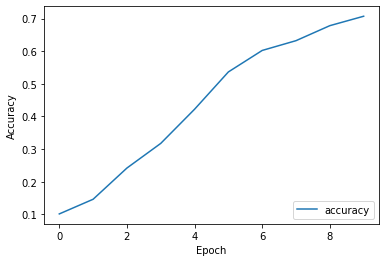

In [ ]:
plt.plot(history_resnet50.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

val_acc

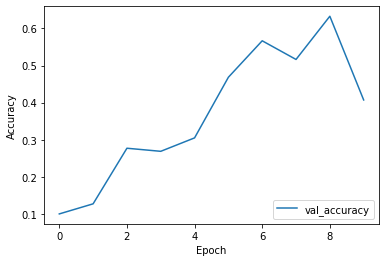

In [ ]:
plt.plot(history_resnet50.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

loss

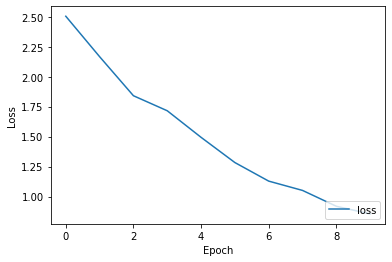

In [ ]:
plt.plot(history_resnet50.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

val_loss

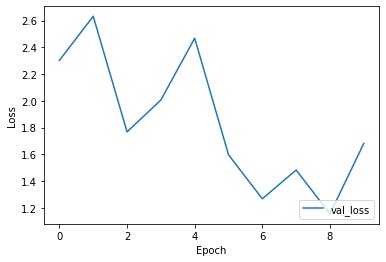

In [ ]:
plt.plot(history_resnet50.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

In [ ]:
import pandas as pd

history_df = pd.DataFrame(history.history) 
history_df.to_csv('history.csv', index=False)

history_resnet50_df = pd.DataFrame(history_resnet50.history) 
history_resnet50_df.to_csv('history_resnet50.csv', index=False)

In [3]:
import cv2
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import keras
from keras.models import Sequential, Model,load_model
from tensorflow.keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from google.colab.patches import cv2_imshow
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform

In [4]:
def identity_block(X, f, filters, stage, block):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X
   
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])# SKIP Connection
    X = Activation('relu')(X)

    return X

In [6]:
def convolutional_block(X, f, filters, stage, block, s=2):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [7]:
def ResNet50(input_shape=(224, 224, 3)):

    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')


    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    X = X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)
    
    model = Model(inputs=X_input, outputs=X, name='ResNet50')

    return model

In [8]:
base_model = ResNet50(input_shape=(32, 32, 3))
headModel = base_model.output
headModel = Flatten()(headModel)
headModel=Dense(256, activation='relu', name='fc1',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel=Dense(128, activation='relu', name='fc2',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel = Dense(10,activation='sigmoid', name='fc3',kernel_initializer=glorot_uniform(seed=0))(headModel)

In [9]:
model_resnet = Model(inputs=base_model.input, outputs=headModel)


In [10]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.losses import CategoricalCrossentropy

In [12]:
optimizer = Nadam(learning_rate=1e-3)
loss = CategoricalCrossentropy()
model_resnet.compile(optimizer=optimizer, loss=loss, metrics="accuracy")

In [14]:
history_resnet50 = model_resnet.fit(X_train_new, y_train, batch_size=128, epochs=10, validation_data=(X_test_new, y_test))

Epoch 1/10
391/391 [==============================] - 166s 344ms/step - loss: 1.7166 - accuracy: 0.3793 - val_loss: 2.3336 - val_accuracy: 0.2505
Epoch 2/10
391/391 [==============================] - 131s 335ms/step - loss: 1.3047 - accuracy: 0.5337 - val_loss: 1.7132 - val_accuracy: 0.4072
Epoch 3/10
391/391 [==============================] - 131s 335ms/step - loss: 1.1053 - accuracy: 0.6126 - val_loss: 1.4858 - val_accuracy: 0.4936
Epoch 4/10
391/391 [==============================] - 131s 336ms/step - loss: 0.9419 - accuracy: 0.6740 - val_loss: 1.1341 - val_accuracy: 0.6055
Epoch 5/10
391/391 [==============================] - 131s 336ms/step - loss: 0.8341 - accuracy: 0.7093 - val_loss: 1.3663 - val_accuracy: 0.5655
Epoch 6/10
391/391 [==============================] - 132s 338ms/step - loss: 0.7994 - accuracy: 0.7236 - val_loss: 1.2373 - val_accuracy: 0.5966
Epoch 7/10
391/391 [==============================] - 131s 335ms/step - loss: 0.6666 - accuracy: 0.7690 - val_loss: 1.3981 -

In [15]:
import pandas as pd
history_resnet50_df = pd.DataFrame(history_resnet50.history) 
history_resnet50_df.to_csv('history_resnet50.csv', index=False)

In [16]:
history_resnet50_df

,loss,accuracy,val_loss,val_accuracy
0,1.716560,0.37926,2.333635,0.2505
1,1.304731,0.53370,1.713233,0.4072
2,1.105334,0.61256,1.485788,0.4936
3,0.941924,0.67402,1.134083,0.6055
4,0.834147,0.70934,1.366268,0.5655
5,0.799403,0.72356,1.237297,0.5966
6,0.666551,0.76896,1.398126,0.5910
7,0.578912,0.80090,1.046450,0.6608
8,0.531200,0.81798,1.008331,0.6798
9,0.488778,0.83112,1.062523,0.6714
